# PDP and ICE Plot Tutorial 

The following methods are covered: 
<ul>
<li> PDP + ICE Plot for 1 feature
<li> PDP for 2 features
<li> PDP for binary target variable
</ul>

In [62]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

from sklearn.metrics import accuracy_score,confusion_matrix

path = "/Users/conorosully/Google Drive/My Drive/Medium/PDP and ICE Plots/Python/{}"

## Dataset

In [4]:
#Load dataset
data = pd.read_csv("../../../data/PDP_ICE.csv",sep='\t')

#Get features
y = data['price']
X = data.drop('price', axis=1)

print(len(data))
data.head()

1000


,owner_age,car_age,km_driven,repairs,car_type,price
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053


# Sklearn

In [10]:
# Model
rf = RandomForestRegressor(max_depth=4, n_estimators=100,random_state=0)
rf.fit(X, y)

#Get predictions
y_pred = rf.predict(X)

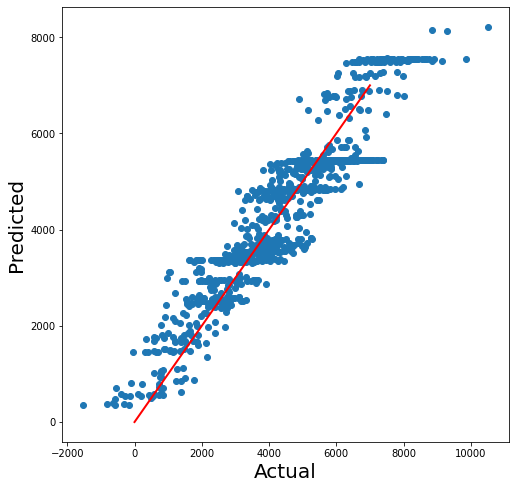

In [20]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 7000], [0, 7000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight', facecolor='white')

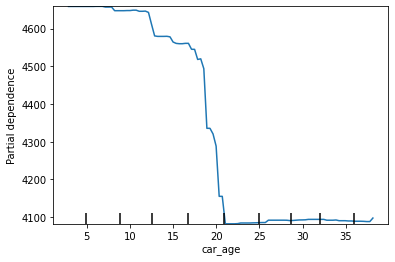

In [98]:
#PDP
features = ["car_age"]
PartialDependenceDisplay.from_estimator(rf, X, features)

plt.savefig(path.format('sklearn_pdp.png'),dpi=200,bbox_inches='tight', facecolor='white')

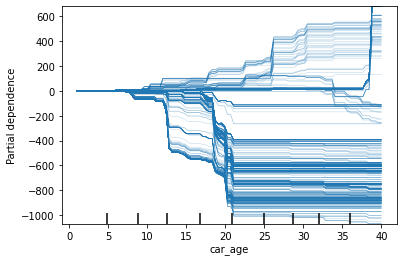

In [44]:
#ICE Plot
PartialDependenceDisplay.from_estimator(rf, 
                                        X, 
                                        features, 
                                        kind='individual',
                                        percentiles = (0,1),
                                        centered= True)

plt.savefig(path.format('sklearn_ice.png'),dpi=200,bbox_inches='tight', facecolor='white')

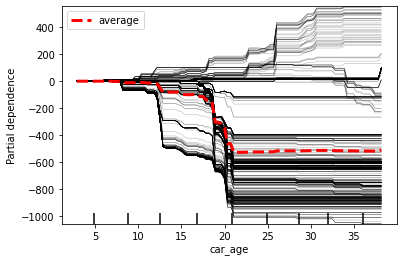

In [99]:
PartialDependenceDisplay.from_estimator(rf, X, features, 
                                        kind='both',
                                        centered= True,
                                        ice_lines_kw={"color": "black"},
                                        pd_line_kw={"color": "red","lw":3,'linestyle':'--'})

plt.savefig(path.format('sklearn_ice_2.png'),dpi=200,bbox_inches='tight', facecolor='white')

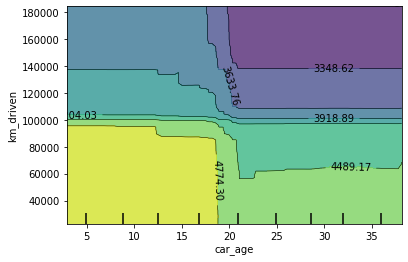

In [96]:
features = [("car_age","km_driven")]
PartialDependenceDisplay.from_estimator(rf, X, features)

plt.savefig(path.format('sklearn_pdp_2.png'),dpi=200,bbox_inches='tight', facecolor='white')

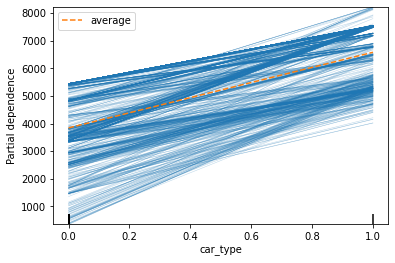

In [78]:
features = ["car_type"]
PartialDependenceDisplay.from_estimator(rf, X, features,kind='both')

plt.savefig(path.format('sklearn_cat_feature.png'),dpi=200,bbox_inches='tight', facecolor='white')

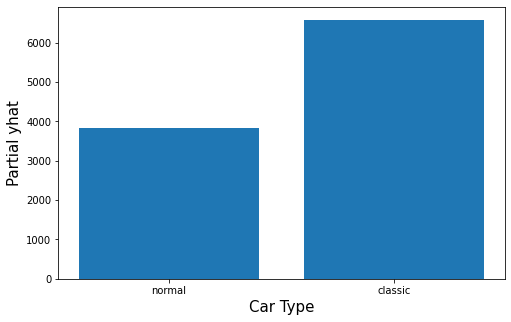

In [94]:
#Get values
features = ["car_type"]
pd_ice = partial_dependence(rf, X, features, kind='both') 

#Get PD values
pd = pd_ice['average'][0]

#Plot PD values
plt.figure(figsize=(8, 5))

labels = ['normal','classic']
x = np.arange(len(labels)) 

plt.bar(x,height= pd)

plt.ylabel('Partial yhat',size=15)
plt.xlabel('Car Type',size=15)
plt.xticks(ticks=x,labels=labels)

plt.savefig(path.format('sklearn_barplot.png'),dpi=200,bbox_inches='tight', facecolor='white')

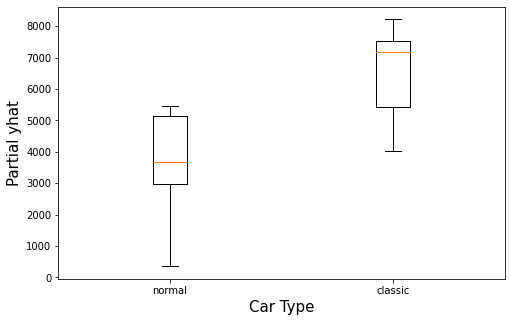

In [95]:
#get ice values
ice = pd_ice['individual'][0]

normal_ice = [i[0] for i in ice]
classic_ice = [i[1] for i in ice]
data = [normal_ice, classic_ice]

#plot ice values
plt.figure(figsize=(8, 5))

plt.boxplot(data,labels=labels)

plt.ylabel('Partial yhat',size=15)
plt.xlabel('Car Type',size=15)

plt.savefig(path.format('sklearn_boxplot.png'),dpi=200,bbox_inches='tight', facecolor='white')

# Binary target variable  

In [71]:
#Binary target variable
avg_y = np.mean(y)
y_binary = [1 if y_>avg_y else 0 for y_ in y]

#Train model 
xg = xgb.XGBClassifier(objective="binary:logistic",max_depth=2, n_estimators=100)
xg.fit(X, y_binary)

y_pred = xg.predict(X)

print(confusion_matrix(y_binary, y_pred))
accuracy_score(y_binary, y_pred)

[[499  12]
 [  9 480]]


0.979

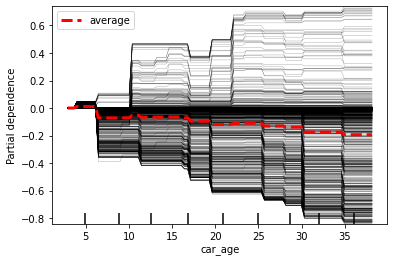

In [77]:
features = ["car_age"]
PartialDependenceDisplay.from_estimator(xg, X, features, 
                                        kind='both',
                                        centered=True,
                                        ice_lines_kw={"color": "black"},
                                        pd_line_kw={"color": "red","lw":3,'linestyle':'--'})

plt.savefig(path.format('sklearn_binary_target.png'),dpi=200,bbox_inches='tight', facecolor='white')